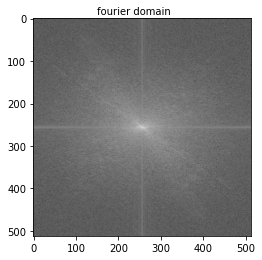

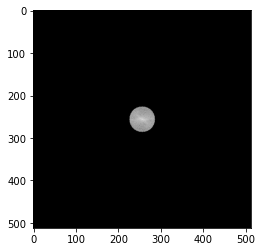

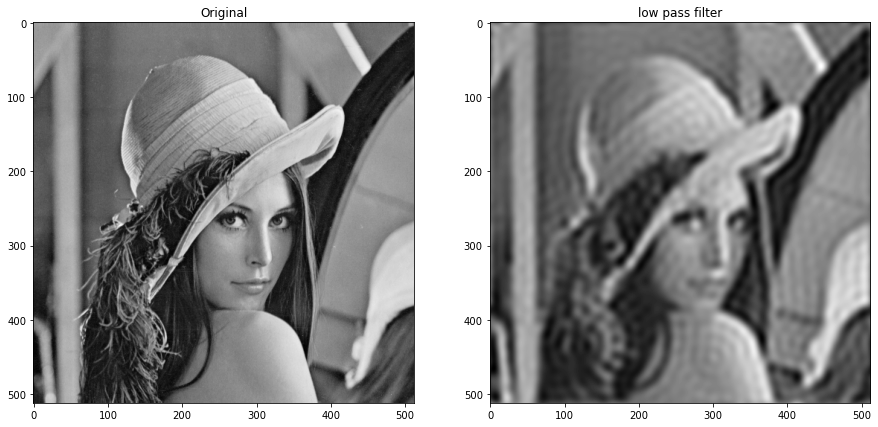

In [16]:
import cv2
import numpy as np
from scipy.fft import fft2, fftshift, ifft2, ifftshift
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('lenna.tif')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform 2D Fourier Transform
f = fft2(gray)

# Shift zero-frequency component to center
fshift = fftshift(f)
abs_ff = abs(fshift)
phase = np.angle(fshift)


# Compute magnitude spectrum
magnitude_spectrum = 20*np.log(1+np.abs(fshift))

# Display the Fourier domain image
plt.figure()
plt.imshow(magnitude_spectrum , cmap='gray')
plt.text(150, -10, 'fourier domain')
plt.show()










# Design a low-pass filter with a radius of 30
rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2
r = 30

# Create a binary mask based on the distance from the center
mask = np.zeros((rows, cols), dtype=np.uint8)
for i in range(rows):
    for j in range(cols):
        if (i - crow) ** 2 + (j - ccol) ** 2 <= r ** 2:
            mask[i, j] = 1

# Apply the filter to the magnitude spectrum
filtered_spectrum = abs_ff * mask

filtered_spectrum = filtered_spectrum * np.exp(1j * phase)

# Apply the filter to the normalized magnitude spectrum
show_spectrum = magnitude_spectrum * mask

show_spectrum = show_spectrum * np.exp(1j*phase)
show_spectrum = abs(show_spectrum)
# Display the filtered Fourier domain image
plt.figure()
plt.imshow(show_spectrum , cmap='gray')
plt.show()






# Apply inverse shift to move zero-frequency component back to top-left corner
f_ishift = ifftshift(filtered_spectrum)

# Apply inverse 2D Fourier Transform
img_back = ifft2(f_ishift)

# Take the absolute value to get rid of any complex numbers
img_back = np.abs(img_back)

# Normalize pixel values between 0 and 255
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

# Convert to 8-bit integer
img_back = img_back.astype('uint8')

# Display the reconstructed image
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(img_back, cmap='gray')
axs[1].set_title('low pass filter')
plt.show()
